<h1>Data collection</h1>

In [61]:
import requests
import pandas as pd

API_KEY = "7cd5217a8c3a597848ddadf02cd684eb"
MOVIE_API_URL = "https://api.themoviedb.org/3/discover/movie"
GENRE_API_URL = f"https://api.themoviedb.org/3/genre/movie/list?api_key={API_KEY}&language=en-US"

def get_genre_mapping():
    response = requests.get(GENRE_API_URL)
    genre_data = response.json()
    return {genre["id"]: genre["name"] for genre in genre_data["genres"]}

def get_movies_with_genres():
    genre_mapping = get_genre_mapping()
    movies = []

    for page in range(1, 500): 
        response = requests.get(MOVIE_API_URL, params={
            "api_key": API_KEY,
            "language": "en-US",
            "page": page
        })
        movie_data = response.json()

        for movie in movie_data["results"]:
            mapped_genres = [genre_mapping[genre_id] for genre_id in movie["genre_ids"]]
            movies.append({
                "Title": movie.get("title"),
                "Original title": movie.get("original_title"),
                "Original language": movie.get("original_language"),
                "Movie description": movie.get("overview"),
                "Rating": movie.get("vote_average"),
                "Vote count": movie.get("vote_count"),
                "Release date": movie.get("release_date"),
                "Genres": ", ".join(mapped_genres),
            })

    return pd.DataFrame(movies)

movies_df = get_movies_with_genres()
movies_df.to_csv("moviesTMDB.csv", index=False)
movies_df  


,Title,Original title,Original language,Movie description,Rating,Vote count,Release date,Genres
0,Venom: The Last Dance,Venom: The Last Dance,en,Eddie and Venom are on the run. Hunted by both...,6.415,1016,2024-10-22,"Science Fiction, Action, Adventure"
1,Moana 2,Moana 2,en,After receiving an unexpected call from her wa...,6.900,412,2024-11-21,"Animation, Adventure, Family, Comedy"
2,Elevation,Elevation,en,A single father and two women venture from the...,6.400,124,2024-11-07,"Action, Science Fiction, Thriller"
3,Absolution,Absolution,en,An aging ex-boxer gangster working as muscle f...,6.100,119,2024-10-31,"Action, Crime, Thriller"
4,Watchmen: Chapter II,Watchmen: Chapter II,en,Suspicious of the events ensnaring their forme...,7.700,41,2024-11-25,"Animation, Mystery, Science Fiction, Action"
...,...,...,...,...,...,...,...,...
9975,The Fast and the Furious: Tokyo Drift,The Fast and the Furious: Tokyo Drift,en,"In order to avoid a jail sentence, Sean Boswel...",6.500,6877,2006-06-03,"Action, Crime, Drama, Thriller"
9976,A Sudden Case of Christmas,A Sudden Case of Christmas,en,An American couple bring their 10 year old dau...,6.556,9,2024-11-08,"Comedy, Family"
9977,Operation Christmas Drop,Operation Christmas Drop,en,While gathering evidence to support closing a ...,6.444,546,2020-11-05,"Comedy, Family, Romance, TV Movie"
9978,The Discord,La Zizanie,fr,Guillaume has made it: A machine that can clea...,6.436,306,1978-03-16,Comedy


In [2]:
import pandas as pd
movies_df = pd.read_csv("moviesTMDB.csv")
duplicates = movies_df.duplicated()
print("Number of duplicate rows:", duplicates.sum())


Number of duplicate rows: 1721


<h1>Data Cleaning and Preprocessing</h1>

In [4]:
import pandas as pd

movies_df = pd.read_csv("moviesTMDB.csv")
movies_df.dropna(subset=['Title', 'Original title', 'Original language', 'Genres', 'Movie description', 'Rating', 'Vote count', 'Release date'], inplace=True)
movies_df = movies_df.drop_duplicates()
movies_df.to_csv("moviesTMDB.CLEANED.csv", index=False)
movies_df

,Title,Original title,Original language,Movie description,Rating,Vote count,Release date,Genres
0,Venom: The Last Dance,Venom: The Last Dance,en,Eddie and Venom are on the run. Hunted by both...,6.415,1016,2024-10-22,"Science Fiction, Action, Adventure"
1,Moana 2,Moana 2,en,After receiving an unexpected call from her wa...,6.900,412,2024-11-21,"Animation, Adventure, Family, Comedy"
2,Elevation,Elevation,en,A single father and two women venture from the...,6.400,124,2024-11-07,"Action, Science Fiction, Thriller"
3,Absolution,Absolution,en,An aging ex-boxer gangster working as muscle f...,6.100,119,2024-10-31,"Action, Crime, Thriller"
4,Watchmen: Chapter II,Watchmen: Chapter II,en,Suspicious of the events ensnaring their forme...,7.700,41,2024-11-25,"Animation, Mystery, Science Fiction, Action"
...,...,...,...,...,...,...,...,...
9975,The Fast and the Furious: Tokyo Drift,The Fast and the Furious: Tokyo Drift,en,"In order to avoid a jail sentence, Sean Boswel...",6.500,6877,2006-06-03,"Action, Crime, Drama, Thriller"
9976,A Sudden Case of Christmas,A Sudden Case of Christmas,en,An American couple bring their 10 year old dau...,6.556,9,2024-11-08,"Comedy, Family"
9977,Operation Christmas Drop,Operation Christmas Drop,en,While gathering evidence to support closing a ...,6.444,546,2020-11-05,"Comedy, Family, Romance, TV Movie"
9978,The Discord,La Zizanie,fr,Guillaume has made it: A machine that can clea...,6.436,306,1978-03-16,Comedy


In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
vote_count_data = movies_df[['Vote count']]

min_max_scaler = MinMaxScaler()

movies_df['Vote count minmax'] = min_max_scaler.fit_transform(vote_count_data)
movies_df[['Vote count', 'Vote count minmax']]


,Vote count,Vote count minmax
0,1016,0.027737
1,412,0.011248
2,124,0.003385
3,119,0.003249
4,41,0.001119
...,...,...
9975,6877,0.187742
9976,9,0.000246
9977,546,0.014906
9978,306,0.008354


In [6]:
genres_encoded = movies_df['Genres'].str.get_dummies(sep=', ')
genres_encoded

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9975,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
9976,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9977,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
9978,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<h1>Exploratory Data Analysis</h1>

In [7]:
import pandas as pd
movies_df = pd.read_csv("moviesTMDB.CLEANED.csv")

mean_rating = movies_df['Rating'].mean()
median_rating = movies_df['Rating'].median()
std_rating = movies_df['Rating'].std()

print(f"Mean Rating: {mean_rating}")
print(f"Median Rating: {median_rating}")
print(f"Standard Deviation of Ratings: {std_rating}")

Mean Rating: 6.43394195444526
Median Rating: 6.6
Standard Deviation of Ratings: 1.238355848852736


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

movies_df = pd.read_csv("moviesTMDB.CLEANED.csv")

movies_df.dropna(subset=['Rating', 'Vote count', 'Release date'], inplace=True)
movies_df['Release date'] = pd.to_datetime(movies_df['Release date'], errors='coerce')
movies_df['Release year'] = movies_df['Release date'].dt.year


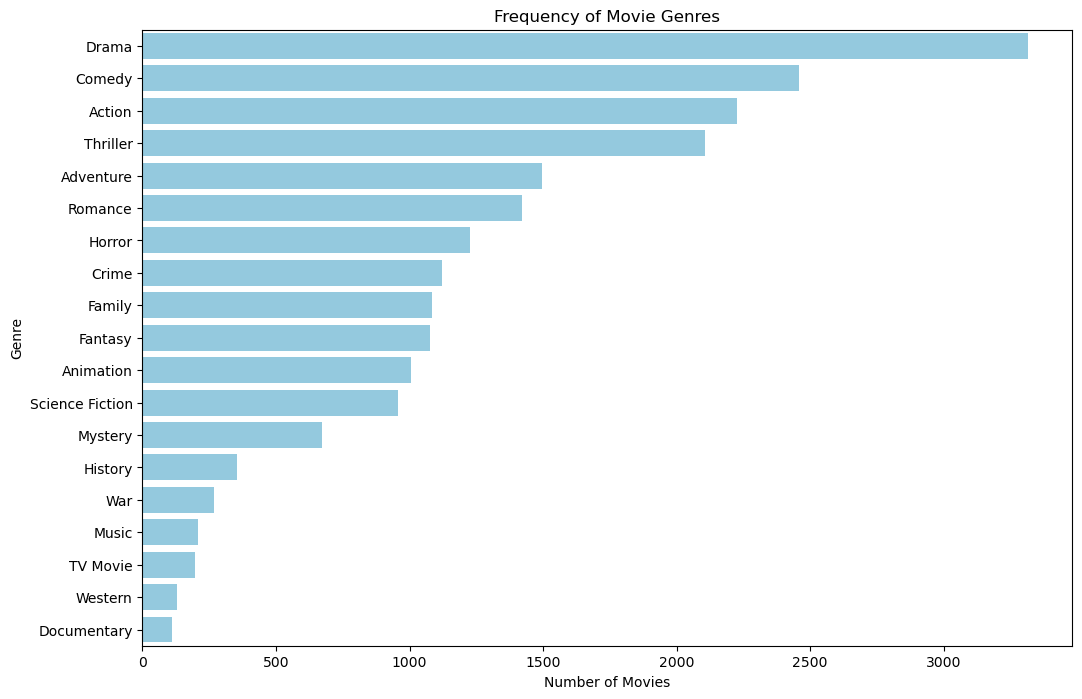

In [9]:
movies_df['Genres'] = movies_df['Genres'].str.split(', ')

all_genres = []
for genre_list in movies_df['Genres'].dropna():  
    all_genres.extend(genre_list)

genre_counts = pd.Series(all_genres).value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.values, y=genre_counts.index, color = "skyblue")
plt.title('Frequency of Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()


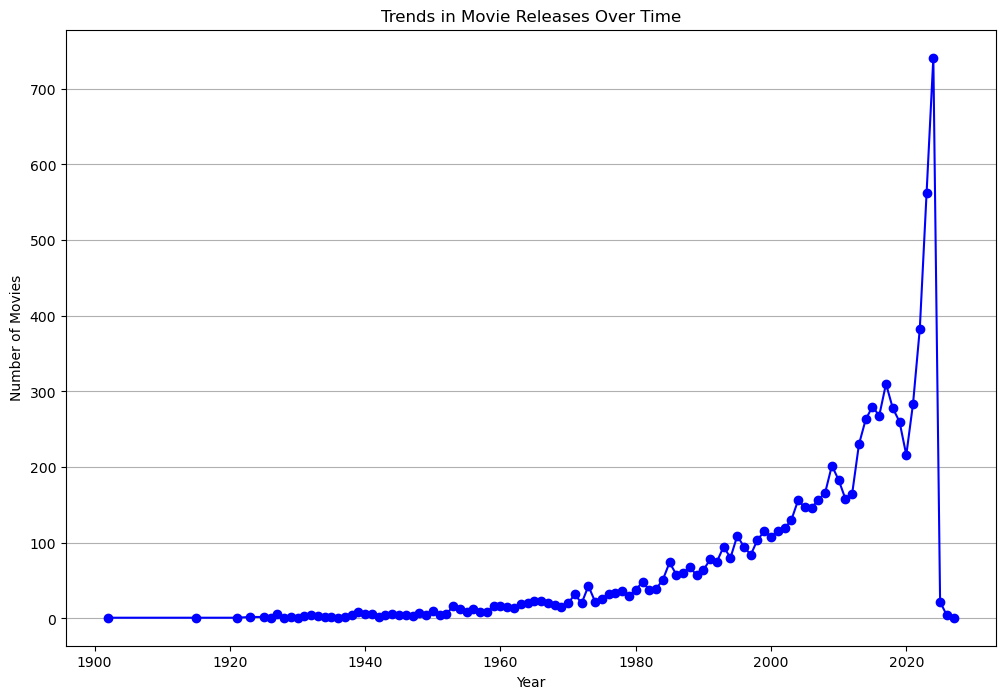

In [10]:
release_counts = movies_df['Release year'].value_counts().sort_index()

plt.figure(figsize=(12, 8))
release_counts.plot(kind='line', marker='o', color='b')
plt.title('Trends in Movie Releases Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(axis='y')
plt.show()

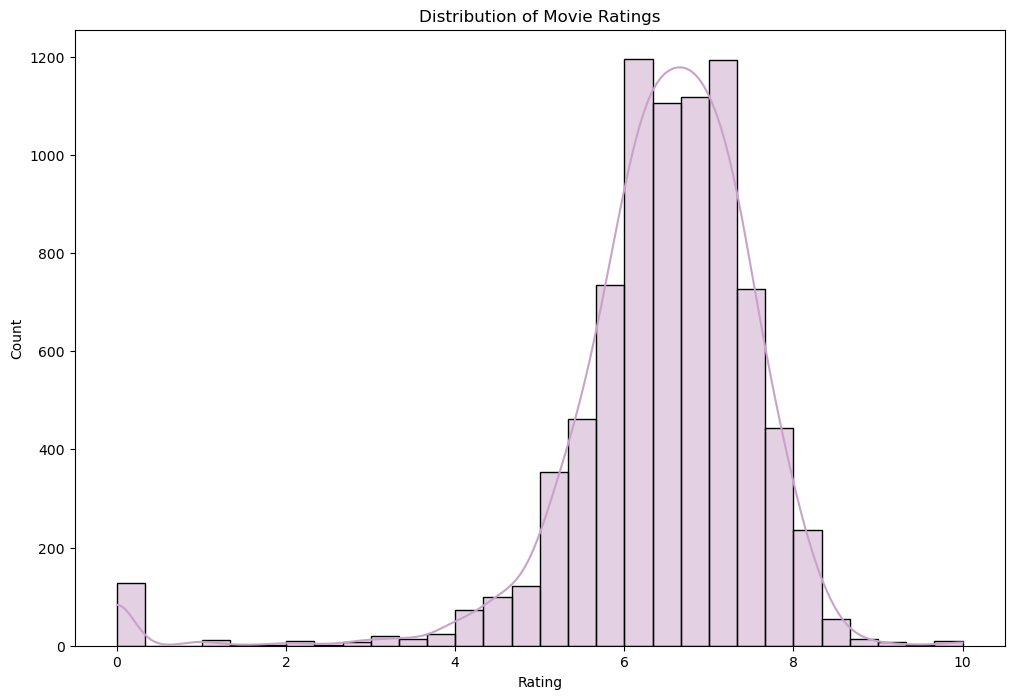

In [11]:
plt.figure(figsize=(12, 8))
sns.histplot(movies_df['Rating'], bins=30, kde=True, color='#c8a2c8')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

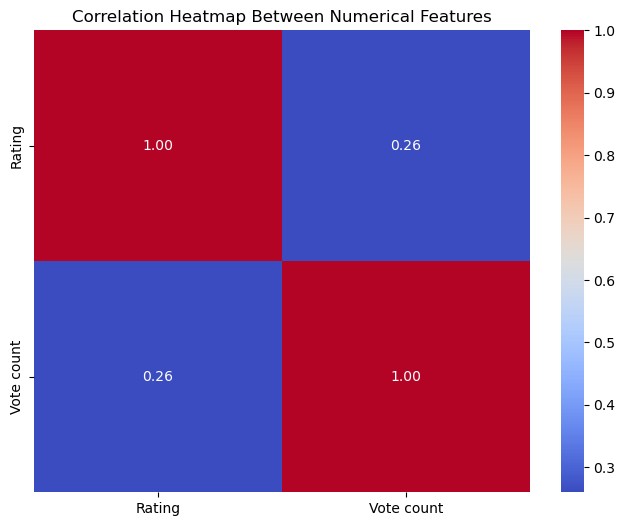

In [12]:
numerical_features = movies_df[['Rating', 'Vote count']].dropna()

correlation_matrix = numerical_features.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap Between Numerical Features')
plt.show()

<h1>Linear Regression Model for Rating Prediction</h1>

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

movies_df = pd.read_csv("moviesTMDB.CLEANED.csv")
movies_df['Release year'] = pd.to_datetime(movies_df['Release date'], errors='coerce').dt.year
genres_encoded = movies_df['Genres'].str.join('|').str.get_dummies()

movies_df = pd.concat([movies_df, genres_encoded], axis=1)

features = ['Release year', 'Vote count'] + list(genres_encoded.columns)
X = movies_df[features]
y = movies_df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))  
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2 Score: {r2}")


Model Evaluation:
RMSE: 1.1076899213323395
MAE: 0.7163864851966834
R2 Score: 0.13684226276339595


In [44]:
y_pred = model.predict(X_test)
print("\nPredicted prices:", ", ".join(map(str, y_pred[:5])))
print("Actual prices:", ", ".join(map(str, y_test.values[:5])))


Predicted prices: 6.755333142076466, 6.478040579792939, 6.303450187849833, 6.657647661752424, 6.700034932499591
Actual prices: 6.5, 7.606, 6.256, 6.5, 5.851


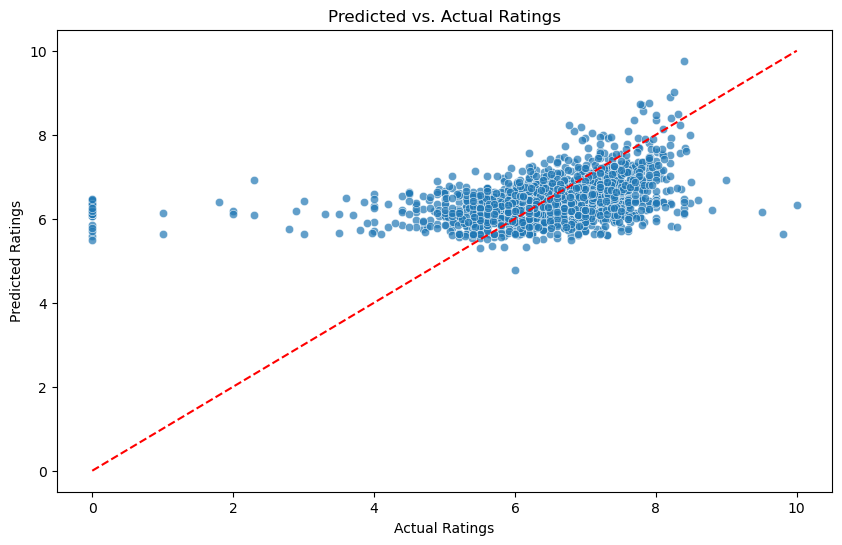

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Predicted vs. Actual Ratings")
plt.show()

<h2>DecisionTreeRegressor Model for Rating Prediction</h2>

In [45]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42, max_depth=5) 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))  
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2 Score: {r2}")

Model Evaluation:
RMSE: 0.847149259210024
MAE: 0.6143909861360792
R2 Score: 0.49513689920524895


In [46]:
y_pred = model.predict(X_test)
print("\nPredicted prices:", ", ".join(map(str, y_pred[:5])))
print("Actual prices:", ", ".join(map(str, y_test.values[:5])))


Predicted prices: 6.3715853300733505, 6.654221122112207, 7.077125000000007, 6.3715853300733505, 6.3715853300733505
Actual prices: 6.5, 7.606, 6.256, 6.5, 5.851


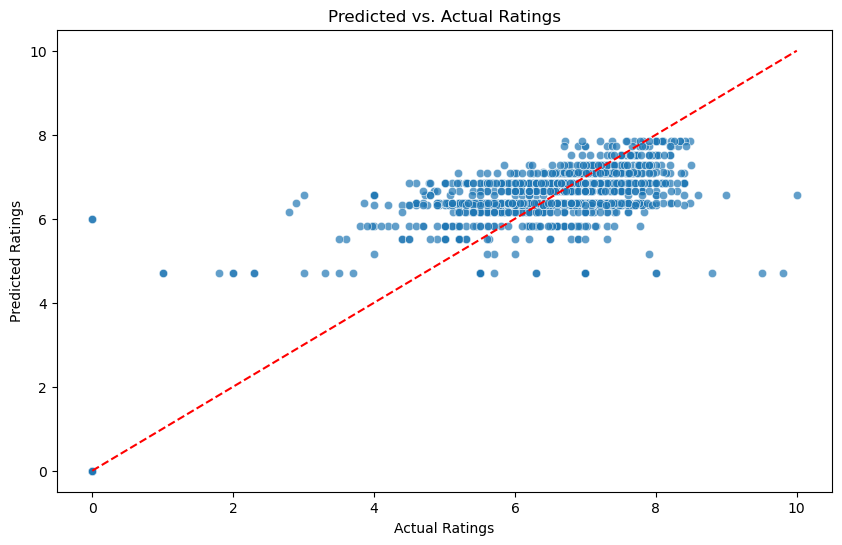

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Predicted vs. Actual Ratings")
plt.show()

<h2>RandomForestRegressor Model for Rating Prediction</h2>

In [47]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=5) 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred)) 
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2 Score: {r2}")

Model Evaluation:
RMSE: 0.7983240650716878
MAE: 0.5862072371621785
R2 Score: 0.5516551333651643


In [48]:
y_pred = model.predict(X_test)
print("\nPredicted prices:", ", ".join(map(str, y_pred[:5])))
print("Actual prices:", ", ".join(map(str, y_test.values[:5])))


Predicted prices: 6.528567148140959, 6.608944464236208, 6.959404215553729, 6.520834477637286, 6.528795631293553
Actual prices: 6.5, 7.606, 6.256, 6.5, 5.851


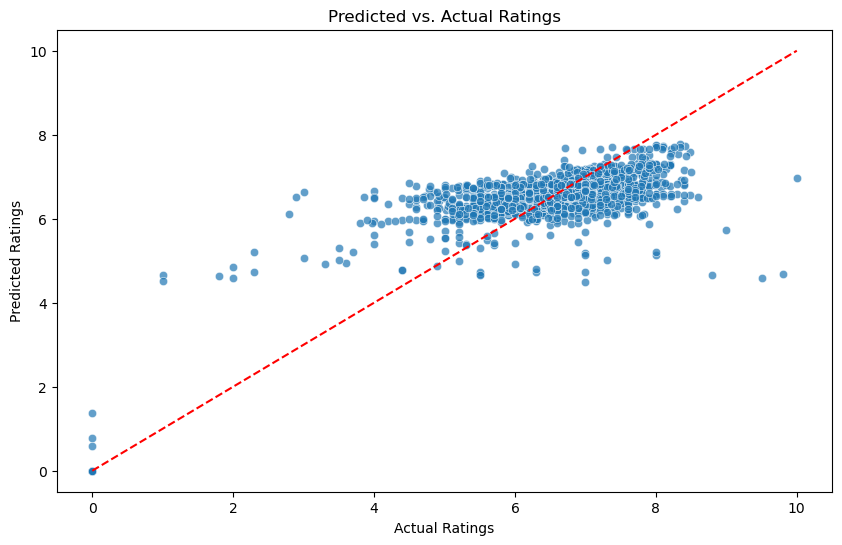

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Predicted vs. Actual Ratings")
plt.show()

<h1>Building a Simple Recommendation System</h1>

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

movies_df = pd.read_csv("moviesTMDB.CLEANED.csv")

movies_df['Genres'] = movies_df['Genres'].fillna('').astype(str)
movies_df['Movie description'] = movies_df['Movie description'].fillna('')

movies_df['combined_features'] = movies_df['Genres'] + " " + movies_df['Movie description']

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(movies_df['combined_features'])

def recommend_movies(user_movie, top_n=5):
    try:
        if user_movie not in movies_df['Title'].values:
            raise ValueError("Movie not found in the database. Please enter a valid movie name.")
            
        movie_index = movies_df[movies_df['Title'] == user_movie].index[0]

        cosine_sim = cosine_similarity(tfidf_matrix[movie_index], tfidf_matrix).flatten()

        similar_movies = movies_df.iloc[cosine_sim.argsort()[-top_n-1:-1][::-1]]

        recommendations = similar_movies[['Title', 'Rating', 'Genres']]

        return recommendations
    except Exception as e:
        return str(e)

user_input = input("Enter the name of a movie you liked: ")
recommendations = recommend_movies(user_input)

if isinstance(recommendations, str):
    print(recommendations)
else:
    print("\nRecommended movies based on your input:")
    print(recommendations.to_string(index=False))


Enter the name of a movie you liked:  Shrek



Recommended movies based on your input:
           Title  Rating                                                 Genres
         Shrek 2   7.300 Animation, Family, Comedy, Fantasy, Adventure, Romance
         Shrek 5   0.000                     Animation, Family, Comedy, Fantasy
  Thriller Night   6.835                       Animation, Music, Horror, Comedy
 Shrek the Third   6.300          Fantasy, Adventure, Animation, Comedy, Family
Scared Shrekless   6.700                              Animation, Comedy, Family


<h1>Data Storage and Access</h1>

In [39]:
import sqlite3
import pandas as pd

movies_df = pd.read_csv("moviesTMDB.CLEANED.csv")

conn = sqlite3.connect("movies.db")
movies_df.to_sql("movies", conn, if_exists="replace", index=False)
conn.close()
print("Data stored in the database successfully.")


Data stored in the database successfully.


In [40]:
def get_connection():
    return sqlite3.connect("movies.db")

def fetch_movies():
    conn = get_connection()
    query = "SELECT * FROM movies"
    df = pd.read_sql(query, conn)
    conn.close()
    return df
fetch_movies()

,Title,Original title,Original language,Movie description,Rating,Vote count,Release date,Genres
0,Venom: The Last Dance,Venom: The Last Dance,en,Eddie and Venom are on the run. Hunted by both...,6.415,1016,2024-10-22,"Science Fiction, Action, Adventure"
1,Moana 2,Moana 2,en,After receiving an unexpected call from her wa...,6.900,412,2024-11-21,"Animation, Adventure, Family, Comedy"
2,Elevation,Elevation,en,A single father and two women venture from the...,6.400,124,2024-11-07,"Action, Science Fiction, Thriller"
3,Absolution,Absolution,en,An aging ex-boxer gangster working as muscle f...,6.100,119,2024-10-31,"Action, Crime, Thriller"
4,Watchmen: Chapter II,Watchmen: Chapter II,en,Suspicious of the events ensnaring their forme...,7.700,41,2024-11-25,"Animation, Mystery, Science Fiction, Action"
...,...,...,...,...,...,...,...,...
8161,The Fast and the Furious: Tokyo Drift,The Fast and the Furious: Tokyo Drift,en,"In order to avoid a jail sentence, Sean Boswel...",6.500,6877,2006-06-03,"Action, Crime, Drama, Thriller"
8162,A Sudden Case of Christmas,A Sudden Case of Christmas,en,An American couple bring their 10 year old dau...,6.556,9,2024-11-08,"Comedy, Family"
8163,Operation Christmas Drop,Operation Christmas Drop,en,While gathering evidence to support closing a ...,6.444,546,2020-11-05,"Comedy, Family, Romance, TV Movie"
8164,The Discord,La Zizanie,fr,Guillaume has made it: A machine that can clea...,6.436,306,1978-03-16,Comedy


In [38]:
import pandas as pd
def fetch_movie_by_title(title):
    conn = get_connection()
    query = "SELECT * FROM movies WHERE title = ?"
    df = pd.read_sql(query, conn, params=(title,))
    conn.close()
    return df

movie_title = "Inception"
fetch_movie_by_title(movie_title)


,Title,Original title,Original language,Movie description,Rating,Vote count,Release date,Genres
0,Inception,Inception,en,"Cobb, a skilled thief who commits corporate es...",8.5,36630,2010-07-15,"Action, Science Fiction, Adventure"


In [41]:
def update_rating(movie_title, new_rating):
    conn = get_connection()
    cursor = conn.cursor()
    cursor.execute("UPDATE movies SET Rating = ? WHERE Title = ?", (new_rating, movie_title))
    
    conn.commit()
    conn.close()
update_rating(movie_title="Inception", new_rating=9)

In [42]:
movie_title = "Inception"
fetch_movie_by_title(movie_title)

,Title,Original title,Original language,Movie description,Rating,Vote count,Release date,Genres
0,Inception,Inception,en,"Cobb, a skilled thief who commits corporate es...",9.0,36630,2010-07-15,"Action, Science Fiction, Adventure"


In [11]:
def get_recommendations_by_genre(genre, top_n=5):
    conn = get_connection()
    query = f"""
        SELECT Title, Rating
        FROM movies
        WHERE Genres LIKE '%{genre}%'
        ORDER BY Rating DESC
        LIMIT {top_n}
    """
    df = pd.read_sql(query, conn)
    conn.close()
    return df

genre_recommendations = get_recommendations_by_genre("Romance", top_n=5)
genre_recommendations


,Title,Rating
0,Salome,10.0
1,Female Hostel 3,9.8
2,The Double Life of My Billionaire Husband,9.2
3,Meeting Conditions of a Virgin,9.0
4,Love in the Big City,8.8


In [18]:
get_recommendations_by_genre("Comedy", top_n=10)

,Title,Rating
0,Hard Truths,10.000
1,Better Man,9.000
2,Crayon Shin-chan: Ora's Dinosaur Diary,8.700
3,Umamusume: Pretty Derby – Beginning of a New Era,8.700
4,The Best Christmas Pageant Ever,8.700
5,Parasite,8.506
6,Reunion Goals: The Beginning,8.500
7,Dilwale Dulhania Le Jayenge,8.500
8,Heavier Trip,8.500
9,Scooby-Doo! Adventures: The Mystery Map,8.400
